# **TweetsText Mining Classification XLNet Cyberbulling**

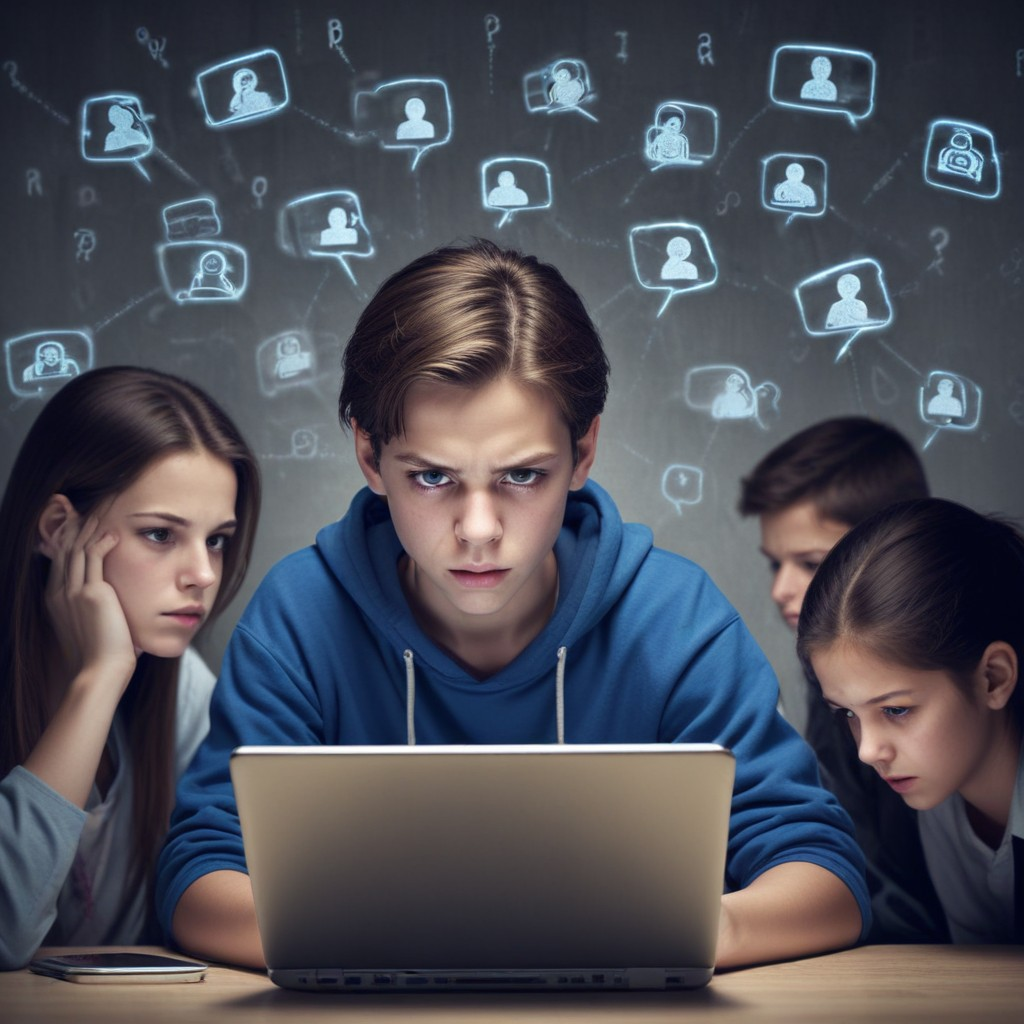

In [ ]:
# En caso de problemas, utilizar las dependencias de librer√≠as de este requierement: https://github.com/googlecolab/backend-info/blob/d6d345cb94fc5fd49951c9af0f6ead5e962bfab2/pip-freeze.txt
!pip install numpy==1.23.5
!pip install transformers[torch]==4.35.2
!pip install accelerate -U
!pip install evaluate
!pip install accelerate --upgrade

  Using cached transformers-4.35.2-py3-none-any.whl (7.9 MB)
  Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Using cached accelerate-0.30.1-py3-none-any.whl (302 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 

In [ ]:
import pandas as pd
def load_prepare_data(path):
  """
  Funci√≥n para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

# **Proyecto**


En este Proyecto vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Uno de los mayores problemas en el internet de hoy en d√≠a es la presencia de actitudes negativas hacia algunos colectivos en relaci√≥n a su etnia, g√©nero, religi√≥n o ideolog√≠a pol√≠tica. En este ejercicio trabajaremos con un conjunto de datos reales, etiquetados manualmente, procedentes de la plataforma [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Originalmente, a cada documento del dataset se le asign√≥ una de las siguientes categor√≠as:
- *religion*
- *age*
- *ethnicity*
- *gender*
- *other_cyberbullying*
- *not_cyberbullying*


El objetivo inicial del dataset era su uso para entrenar un modelo capaz de detectar el tipo de contenido de odio presente en internet seg√∫n el colectivo al que se atacaba. En este caso, para simplificar el ejercicio, se ha generado una funci√≥n `load_prepare_data()` que cambia las categor√≠as del dataset obten√≠endose al final 2 categor√≠as con valor 1 o 0, indicando si el tweet tiene contenido de odio

Entrenaremos un modelo de clasificaci√≥n utilizando la librer√≠a Transformers.Obviamos el an√°lisis exploratorio ya que ha sido realizado en el proyecto anterior.

## ü§ó HuggingFace Transformers

HuggingFace est√° construido sobre el objeto ``pipeline()``. Esta funci√≥n permite abstraerse de la complejidad del c√≥digo y focalizar los esfuerzos en la atarea que se quiere conseguir realizar.

Pipeline permite, entre otras cosas, cargar pipeline pre-entrenada para diferentes tareas como an√°lisis de sentimiento, text-generation o traducci√≥n de forma muy sencilla.

En primer lugar se cargar√≠a el m√≥dulo

In [ ]:
from transformers import pipeline



*   An√°lisis de sentimiento



In [ ]:
sent_class = pipeline("sentiment-analysis")
sent_class("I hate that rythm, but I love the guitar sound")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.999613344669342}]

*   Generaci√≥n de texto


In [ ]:
gen_text = pipeline("text-generation", model="distilgpt2")
gen_text("I hate that rythm, but", max_length=50)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I hate that rythm, but I\'m not an adult person.\n"Don\'t worry about us, what we do," says Giorgio Cifraire.\nBarely two months at his feet, it seems like his biggest'}]

# Fine-tuning de modelo de lenguaje para clasificaci√≥n:

Cuando se entrena un modelo de lenguaje utilizando una arquitectura de tipo Transformers se utilizan grandes cantidades de textos para que la red neuronal aprenda patrones, relaciones y estructuras de un idioma. El resultado de este proceso se conoce como *modelo pre-entrenado*, que esencialmente es una red neuronal que ha capturado el concimiento general del idioma, permitiendo predecir palabras con eficacia, pero sin capacidades de llevar a cabo tareas espec√≠ficas como la clasificaci√≥n de textos.

El poder de los modelos pre-entrenados radica en su capacidad para ser ajustados o *afinados* y resolver una tarea espec√≠fica como traducci√≥n autom√°tica, resumen de textos, extracci√≥n de informaci√≥n o **clasificaci√≥n de textos**. Este proceso de ajuste se conoce como *fine-tuning*, y cuando se aplica se aprovecha el conocimiento adquirido por el modelo de lenguaje en el pre-entrenamiento para resolver el problema en cuesti√≥n.

Cuando llevamos a cabo el ajuste de un modelo pre-entrenado para resolver un problema de clasificaci√≥n se incorpora una *classification head* que utiliza las representaciones vectoriales generadas por el modelo de lenguaje para crear predicciones espec√≠ficas de las categor√≠as que queremos predecir asociadas al texto, previo proceso de ense√±ar a esa capa a llevar a cabo la clasificaci√≥n de forma efectiva. Cuando se utiliza la librer√≠a *Transformers* esta capa de clasificaci√≥n es una red neuronal simple, pero podr√≠a utilizarse cualquier otra estructura como un regresor log√≠stico.


## 0. Imports


In [ ]:
from transformers import (
   AutoConfig,
   AutoTokenizer,
   AutoModelForSequenceClassification,
   AdamW
)
import torch
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import imblearn
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import pandas as pd

# Introducci√≥n

- En este cuaderno, exploramos las capacidades avanzadas de XLNet, un modelo de lenguaje de vanguardia, en el contexto de la detecci√≥n y clasificaci√≥n del ciberacoso. XLNet, desarrollado por investigadores de Google y la Universidad Carnegie Mellon, es un modelo de preentrenamiento autorregresivo generalizado.

- A diferencia de los modelos BERT tradicionales, XLNet captura el contexto bidireccional mediante el uso de un enfoque de entrenamiento basado en permutaciones. Este m√©todo permite que el modelo aprenda el contexto de una palabra bas√°ndose en todas las permutaciones de las palabras en una oraci√≥n, ofreciendo as√≠ una comprensi√≥n m√°s profunda de la sem√°ntica del lenguaje.

### Objetivo

- El objetivo principal es ajustar XLNet para la tarea de clasificar texto en dos categor√≠as de ciberacoso. Las categor√≠as consideradas en este estudio son "ciberacoso", "no_ciberacoso".
Estas categor√≠as cubren un amplio espectro de incidentes de ciberacoso, lo que nos permite desarrollar un modelo robusto que se puede utilizar de manera efectiva en diversos entornos en l√≠nea.

In [ ]:
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
# Path de datos alternativos en caso de que el anterior no funcione (al estar alojado en github puede haber limitaciones
# en la descarga.
# path_data = "https://zenodo.org/records/10938455/files/cyberbullying_tweets.csv?download=1"
data = load_prepare_data(path_data)

In [ ]:
data.head()

tweet_text  cyberbullying
0  In other words #katandandre, your food was cra...              0
1  Why is #aussietv so white? #MKR #theblock #ImA...              0
2  @XochitlSuckkks a classy whore? Or more red ve...              0
3  @Jason_Gio meh. :P  thanks for the heads up, b...              0
4  @RudhoeEnglish This is an ISIS account pretend...              0

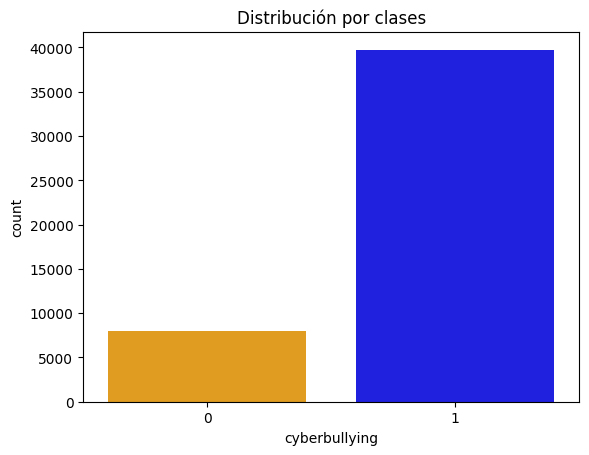

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar los datos y calcular el conteo
data_grouped = data.groupby('cyberbullying').size().reset_index(name='count')

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear el gr√°fico de barras
sns.barplot(x='cyberbullying', y='count', data=data_grouped, palette=['orange', 'blue'], ax=ax)

# Configurar el t√≠tulo y mostrar el gr√°fico
ax.set_title('Distribuci√≥n por clases')
plt.show()



Como se puede observar existe desbalanceo de clases, lo cual solucionaremos m√°s adelante.


In [ ]:
import plotly.express as px

# Definimos la secuencia de colores
color_discrete_sequence = ['orange', 'blue']

# Creamos el boxplot
fig = px.box(data,
             x='cyberbullying',
             y=data['tweet_text'].apply(lambda x: len(x.split())),  # Calculamos la longitud de los tweets aqu√≠
             color='cyberbullying',
             color_discrete_sequence=color_discrete_sequence,
             template='plotly',
             title='Boxplot de Longitudes de Tweets por clase')

# Ajustamos el rango del eje y
fig.update_yaxes(range=[0, 100])

# Mostramos el gr√°fico
fig.show()



Tambi√©n se observan outliers en la cateror√≠a 1, por encima de 70 palablras por tweet.

### Cleaning the Dataset

In [ ]:
# N√∫mero de tweets en cada categor√≠a con menos de diez palabras
tweets_c0 = 53
tweets_c1 = 151

# N√∫mero total de tweets
total_tweets = 47692

# Calcula los porcentajes
porcentaje_cat0 = (tweets_c0 / total_tweets) * 100
porcentaje_cat1 = (tweets_c1 / total_tweets) * 100

# Imprime los resultados
# Imprime los resultados con el s√≠mbolo %
print("Porcentaje de tweets con menos de 10 palabras en la categor√≠a 0: %.2f%%" % porcentaje_cat0)
print("Porcentaje de tweets con menos de 10 palabras en la categor√≠a 1: %.2f%%" % porcentaje_cat1)


Porcentaje de tweets con menos de 10 palabras en la categor√≠a 0: 0.11%
Porcentaje de tweets con menos de 10 palabras en la categor√≠a 1: 0.32%


Posteriormente podremos filtrar los tokens o subtokens en el Procesado

In [ ]:
cantidad_duplicados = np.sum(data.duplicated(subset=["tweet_text"]))

if cantidad_duplicados > 0:
    print("Existen {} documentos duplicados".format(cantidad_duplicados))
    # Quitaremos esos duplicados
    dataset = data.drop_duplicates(subset=["tweet_text"])
    print("Despu√©s de quitar duplicados, tenemos un conjunto de {} documentos".format(dataset.shape[0]))
else:
    print("No hay documentos duplicados en el conjunto de datos.")

Existen 1675 documentos duplicados
Despu√©s de quitar duplicados, tenemos un conjunto de 46017 documentos


Ahora procederemos a renombrar las variables, para mayor facilidad al escribir el c√≥digo.

In [ ]:
texts = data.tweet_text.values  # an array of strings
labels = data.cyberbullying.values  # an array of integers

Despues dividimos el conjunto de datos en Train-Validation (80%) y Test(10%)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)

# Crear el sobremuestreador
ros = RandomOverSampler(random_state=42)

# Aplicar el sobremuestreo a los datos de entrenamiento
train_texts_res, train_labels_res = ros.fit_resample([[t] for t in train_texts], train_labels)

# Aplanar la lista de listas resultante
train_texts_res = [item for sublist in train_texts_res for item in sublist]

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validaci√≥n
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts_res, train_labels_res, test_size=.2, random_state=0, stratify=train_labels_res)


In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch

In [ ]:
model_name = 'xlnet-base-cased'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
texto = "feminazy"
texto_tokens = tokenizer(texto).tokens()
texto_tokens

['‚ñÅfe', 'mina', 'zy', '<sep>', '<cls>']

In [ ]:
from transformers import XLNetTokenizer, XLNetModel
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])

        # Tokenizar el texto
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        # Devolver el diccionario con los datos
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [ ]:
from transformers import XLNetTokenizer

tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')


In [ ]:
max_length = 128  # Puedes ajustar esto seg√∫n tus necesidades

train_dataset = CustomDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer, max_length)
test_dataset = CustomDataset(test_texts, test_labels, tokenizer, max_length)


Podremos ver que cada elemento del nuevo formato tendr√°:
- *inputs_ids*: Identificadores num√©ricos de los tokens en el vocabulario del modelo
- *attention_mask*: Vector que indica a la red neuronal qu√© partes de la secuencia de entrada debe prestar atenci√≥n y cu√°les ignorar.
- *labels*: Este campo contiene la etiqueta asociada al texto

In [ ]:
train_dataset[10]

{'input_ids': tensor([    5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5,     5,     5,     5,     5,     5,     5,     5,    35,
          9131,   919,   712,  1507,  9465,    24,  1081,    20, 18258,   787,
         12558,    17,  7967,   692,   

Antes de preprocesar la entrada, necesitamos definir la longitud de la secuencia (longitud maxima del documento en tokens) y el Batch size. En Colab, hay limitaciones (batch = 8 y secuencia=96). Si se reduciera el batch se podr√≠a incrementar el tama√±o, pero en este caso nos es indiferente.

### Entrenamiento

Para llevar a cabo el entrenamiento tenemos que cargar el modelo en el entorno de ejecuci√≥n. Para ello utilizaremos la clase `AutoModelForSequenceClassification()`, que permite cargar modelos  que van a ser ajustados para clasificar secuencias de textos.

Dentro de esta clase especificaremos el n√∫mero de etiquetas que tenemos en nuestro problema de clasificaci√≥n (en este caso 2), e introduciremos unos diccionarios para gestionar y entender mejor la salida del modelo.

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

id2label = {0: "NO_CYBERBULLYING", 1: "CYBERBULLYING"}
label2id = {"NO_CYBEBULLYIN": 0, "CYBERBULLYING": 1}
model = AutoModelForSequenceClassification.from_pretrained(model_name,  num_labels=2, id2label=id2label, label2id=label2id)

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import evaluate

accuracy = evaluate.load("accuracy")
f1_score = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    accuracy_value = accuracy.compute(predictions=predictions, references=labels)
    f1_score_value = f1_score.compute(predictions=predictions, references=labels)

    return {
        "accuracy": accuracy_value,
        "f1_score": f1_score_value,
    }

In [ ]:
from transformers import TrainingArguments
import accelerate

training_args = TrainingArguments(
    output_dir="modelo_test",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False
)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

#### Evaluaci√≥n

Una vez entrenado el modelo, llevaremos a cabo su evaluaci√≥n.

El objeto `Trainer()` tiene un m√©todo `.evaluate()` que permite introducir un conjunto de datos de evaluaci√≥n y obtener las m√©tricas accuracy y f1 definidas previamente.

In [ ]:
# N√∫mero de √©pocas
num_epochs = 4

# Listas para almacenar los resultados
train_results = []
valid_results = []
test_results = []

# Bucle para entrenar y evaluar el modelo durante varias √©pocas
for epoch in range(num_epochs):
    print(f"\n√âpoca {epoch+1}/{num_epochs}")

    # Entrenar el modelo
    trainer.train()

    # Evaluar el modelo en el conjunto de entrenamiento
    train_result = trainer.evaluate(train_dataset)
    train_results.append(train_result)

    # Evaluar el modelo en el conjunto de validaci√≥n
    val_result = trainer.evaluate(val_dataset)
    valid_results.append(val_result)

    # Evaluar el modelo en el conjunto de prueba
    test_result = trainer.evaluate(test_dataset)
    test_results.append(test_result)

# Convertir los resultados de la evaluaci√≥n en DataFrames
import pandas as pd
train_df = pd.DataFrame(train_results)
valid_df = pd.DataFrame(valid_results)
test_df = pd.DataFrame(test_results)

# Mostrar los DataFrames
print("\nResultados de entrenamiento:")
print(train_df)
print("\nResultados de validaci√≥n:")
print(valid_df)
print("\nResultados de prueba:")
print(test_df)



√âpoca 1/4


Trainer is attempting to log a value of "{'accuracy': 0.9470870351442724}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.944804395964898}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'accuracy': 0.9816216216216216}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.98133695283339}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9470870351442724}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.944804395964898}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8520809309151903}" of type <class '


√âpoca 2/4


Trainer is attempting to log a value of "{'accuracy': 0.9481091280761066}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9459105064743485}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'accuracy': 0.9821719901719902}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9818900624962561}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9481091280761066}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9459105064743485}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8526050948736765}" of type <clas


√âpoca 3/4


Trainer is attempting to log a value of "{'accuracy': 0.949681578740467}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9478742466199707}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'accuracy': 0.9795773955773955}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9793196791465137}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.949681578740467}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9478742466199707}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8537582555823462}" of type <class


√âpoca 4/4


Trainer is attempting to log a value of "{'accuracy': 0.9460649422124381}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9437889216650278}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'accuracy': 0.9805208845208845}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9802365235426679}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9460649422124381}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9437889216650278}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.85323409162386}" of type <class 


Resultados de entrenamiento:
   eval_loss                     eval_accuracy               eval_f1_score  \
0   0.079835  {'accuracy': 0.9816216216216216}    {'f1': 0.98133695283339}   
1   0.075388  {'accuracy': 0.9821719901719902}  {'f1': 0.9818900624962561}   
2   0.091263  {'accuracy': 0.9795773955773955}  {'f1': 0.9793196791465137}   
3   0.086125  {'accuracy': 0.9805208845208845}  {'f1': 0.9802365235426679}   

   eval_runtime  eval_samples_per_second  eval_steps_per_second  epoch  
0      162.6877                  312.716                 39.093    1.0  
1      160.7017                  316.580                 39.576    1.0  
2      160.9143                  316.162                 39.524    1.0  
3      159.0768                  319.814                 39.981    1.0  

Resultados de validaci√≥n:
   eval_loss                     eval_accuracy               eval_f1_score  \
0   0.251339  {'accuracy': 0.9470870351442724}   {'f1': 0.944804395964898}   
1   0.246733  {'accuracy': 0.9

# Nueva secci√≥n

Tambi√©n vamos a hacer un classification report para ver los scores relativo a cada categor√≠a. Para eso, predeciremos las etiquetas sobre el test set con el m√©todo `.predict()`. Y obtendremos la etiqueta de cada predicci√≥n.

In [ ]:
# Make predictions on the test data
predictions = trainer.predict(test_dataset)

In [ ]:
predictions

PredictionOutput(predictions=array([[-4.077235 ,  4.9082866],
       [ 3.358643 , -3.4173267],
       [-4.0839148,  4.909067 ],
       ...,
       [-4.0834503,  4.909074 ],
       [-4.0555596,  4.904065 ],
       [-4.0818543,  4.908794 ]], dtype=float32), label_ids=array([1, 0, 1, ..., 1, 1, 1]), metrics={'test_loss': 0.8943614959716797, 'test_accuracy': {'accuracy': 0.85323409162386}, 'test_f1_score': {'f1': 0.9104973788518093}, 'test_runtime': 31.82, 'test_samples_per_second': 299.78, 'test_steps_per_second': 37.492})

In [ ]:
predictions[1][3]

1

In [ ]:
# Access the predicted labels
y_pred = predictions.predictions.argmax(axis=1)


Cogemos las etiquetas verdaderas y calculamos el classification report:

In [ ]:
y_true = [x["labels"].item() for x in test_dataset]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[1018  571]
 [ 829 7121]]
              precision    recall  f1-score   support

           0       0.55      0.64      0.59      1589
           1       0.93      0.90      0.91      7950

    accuracy                           0.85      9539
   macro avg       0.74      0.77      0.75      9539
weighted avg       0.86      0.85      0.86      9539




Podemos comparar los resultados con el clasificador obtenido mediante ingenier√≠a de caracter√≠sticas:
                           precision    recall  f1-score   support

           0       0.47      0.64      0.55      1589
           1       0.92      0.86      0.89      7950

    accuracy                           0.82      9539
  

Tambi√©n podemos predecir cualquier frase o tweet que quisi√©ramos de forma sencilla:


In [ ]:
# Create a function to predict for a single document
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def predict_single_document(document, max_length=128):
    # Tokenize the input document
    inputs = tokenizer(document, return_tensors="pt", max_length=max_length, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move tensors to the same device as the model

    # Make the prediction
    with torch.no_grad():
      model_output = trainer.model(**inputs)

    # Access the predicted labels
    predicted_label = torch.argmax(model_output.logits).item()

    return predicted_label

In [ ]:
#@markdown >Escribe el texto que quieras clasificar
input_text1 = 'I hate that noise'
input_text2 = 'I feel so lucky that today is about the quietest its ever been here. Fewer copters, no construction noise. Ahhhhhhhhh #selfcare https://t.co/7Ka4M6wFQv'

pred1 = predict_single_document(input_text1)
pred2 = predict_single_document(input_text2)

# label_mapping = {0:"no molesto",1:"molesto"}

print("Clase texto 1: {}".format(pred1))
print("Clase texto 2: {}".format(pred2))

Clase texto 1: 0
Clase texto 2: 1


##Resumen
En este cuaderno hemos utilizado el fine-tuning es una pr√°ctica com√∫n con el modelo XLNet, especialmente en tareas de clasificaci√≥n de texto. XLNet es un modelo de lenguaje preentrenado que utiliza un m√©todo autoregresivo generalizado para el preentrenamiento. Al realizar fine-tuning de XLNet en un conjunto de datos espec√≠fico, se pueden obtener resultados que superan a los del modelo BERT en varias tareas de procesamiento de lenguaje natural (NLP)12.

El fine-tuning permite ajustar los pesos del modelo preentrenado para que se adapte mejor a las caracter√≠sticas del conjunto de datos objetivo. Esto se hace entrenando el modelo en el nuevo conjunto de datos durante algunas √©pocas, lo que permite que el modelo aprenda las peculiaridades del texto espec√≠fico al que se aplica.

Ajustamos con  el modelo XLNet para clasificar con precisi√≥n el texto en dos diferentes categor√≠as de ciberacoso.Para ello  hemos tenido que cambiar varias funciones para un mejor ajuste a nuestro modelo. Nuestro enfoque se extendi√≥ m√°s all√° de lograr una alta precisi√≥n; Abarcaba un profundo conocimiento de cada paso del proceso y de la funcionalidad de los componentes que utiliz√°bamos.

# Conclusi√≥n


Rendimiento y m√©tricas
El modelo XLNet ajustado mostr√≥ un mejor rendimiento que el modelo RamdomForest, de ingenier√≠a de cara√°cter√≠sticas, pero no demasiado.

El modelo acert√≥ en sus predicciones independientemente de la clase, un 85% de las veces, un 3% m√°s que el modelo anterior.

Precisi√≥n: 55%: esta  precisi√≥n indica la capacidad del modelo para identificar y categorizar correctamente los casos de ciberacoso, algo superior a la del modelo Random-Foreste que era de un 47%.

En general las m√©tricas de este modelo mejoraron el anterior, pero no en demas√≠a, tendr√≠amos que seguir entrenando y ajustando par√°metros para mejorarlo, si bien es cierto que los resultados no est√°n mal, habr√≠a que mejorar la precisi√≥n del mismo.





